# Concentration de CO2 dans l'atmosphère depuis 1958

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import xlrd
import math

on utilise les données disponibles sur le site Web de l'institut Scripps.

In [18]:
data_url = "https://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/in_situ_co2/monthly/monthly_in_situ_co2_mlo.csv"

In [19]:
data_file = "monthly_in_situ_co2_mlo.csv"

import os
import urllib.request
if not os.path.exists(data_file):
    urllib.request.urlretrieve(data_url, data_file)

On voit dans le fichier csv récupéré que les lignes 1 à 57 (incluses) sont des commentaires. On peut donc ignorer ces lignes.

In [20]:
raw_data = pd.read_csv(data_url, encoding = 'iso-8859-1', skiprows=57, skipinitialspace=True)
raw_data[:10]

Yr   Mn   Date     Date.1     CO2 seasonally     fit  seasonally.1  \
0     NaN  NaN    NaN        NaN     NaN   adjusted     NaN  adjusted fit   
1     NaN  NaN  Excel        NaN   [ppm]     [ppm]    [ppm]         [ppm]   
2  1958.0  1.0  21200  1958.0411  -99.99     -99.99  -99.99        -99.99   
3  1958.0  2.0  21231  1958.1260  -99.99     -99.99  -99.99        -99.99   
4  1958.0  3.0  21259  1958.2027  315.71     314.44  316.19        314.91   
5  1958.0  4.0  21290  1958.2877  317.45     315.16  317.30        314.99   
6  1958.0  5.0  21320  1958.3699  317.51     314.69  317.89        315.06   
7  1958.0  6.0  21351  1958.4548  -99.99     -99.99  317.27        315.14   
8  1958.0  7.0  21381  1958.5370  315.87     315.20  315.85        315.22   
9  1958.0  8.0  21412  1958.6219  314.93     316.22  313.97        315.29   

    CO2.1     seasonally.2  Sta  
0  filled  adjusted filled  NaN  
1   [ppm]            [ppm]  NaN  
2  -99.99           -99.99  MLO  
3  -99.99           -99.99  MLO  
4  315.71           314.44  MLO  
5  317.45           315.16  MLO  
6  317.51           314.69  MLO  
7  317.27           315.14  MLO  
8  315.87           315.20  MLO  
9  314.93           316.22  MLO

On retire les deux premières lignes(0 et 1) car ce sont des informations à propos des formats et des unités de mesure.

In [21]:
raw_data.drop(range(2), inplace=True)
raw_data[:10]

Yr    Mn   Date     Date.1     CO2 seasonally     fit seasonally.1  \
2   1958.0   1.0  21200  1958.0411  -99.99     -99.99  -99.99       -99.99   
3   1958.0   2.0  21231  1958.1260  -99.99     -99.99  -99.99       -99.99   
4   1958.0   3.0  21259  1958.2027  315.71     314.44  316.19       314.91   
5   1958.0   4.0  21290  1958.2877  317.45     315.16  317.30       314.99   
6   1958.0   5.0  21320  1958.3699  317.51     314.69  317.89       315.06   
7   1958.0   6.0  21351  1958.4548  -99.99     -99.99  317.27       315.14   
8   1958.0   7.0  21381  1958.5370  315.87     315.20  315.85       315.22   
9   1958.0   8.0  21412  1958.6219  314.93     316.22  313.97       315.29   
10  1958.0   9.0  21443  1958.7068  313.21     316.11  312.43       315.35   
11  1958.0  10.0  21473  1958.7890  -99.99     -99.99  312.42       315.41   

     CO2.1 seasonally.2  Sta  
2   -99.99       -99.99  MLO  
3   -99.99       -99.99  MLO  
4   315.71       314.44  MLO  
5   317.45       315.16  MLO  
6   317.51       314.69  MLO  
7   317.27       315.14  MLO  
8   315.87       315.20  MLO  
9   314.93       316.22  MLO  
10  313.21       316.11  MLO  
11  312.42       315.41  MLO

Les données manquantes sont notées : -99.99.
On aimerait avoir un maximum de données pour travailler, donc on va garder les colonnes **CO2.1** et **seasonally.2**.

In [22]:
raw_data = raw_data.drop(["Yr", "Mn", "Date.1", "CO2", "seasonally", "fit", "seasonally.1", "Sta"], axis="columns")
raw_data[:10]

Date   CO2.1 seasonally.2
2   21200  -99.99       -99.99
3   21231  -99.99       -99.99
4   21259  315.71       314.44
5   21290  317.45       315.16
6   21320  317.51       314.69
7   21351  317.27       315.14
8   21381  315.87       315.20
9   21412  314.93       316.22
10  21443  313.21       316.11
11  21473  312.42       315.41

On convertit **Date** en entier et **CO2.1** et **seasonally.2** en nombres flottant

In [23]:
raw_data["Date"] = raw_data["Date"].astype(int)
raw_data["CO2.1"] = raw_data["CO2.1"].astype(float)
raw_data["seasonally.2"] = raw_data["seasonally.2"].astype(float)

raw_data[:10]

Date   CO2.1  seasonally.2
2   21200  -99.99        -99.99
3   21231  -99.99        -99.99
4   21259  315.71        314.44
5   21290  317.45        315.16
6   21320  317.51        314.69
7   21351  317.27        315.14
8   21381  315.87        315.20
9   21412  314.93        316.22
10  21443  313.21        316.11
11  21473  312.42        315.41

On supprime ensuite les lignes contenant les données manquantes (notées -99.99).

In [24]:
raw_data = raw_data.drop(raw_data.index[raw_data['CO2.1'] == -99.99])

raw_data[:10]

Date   CO2.1  seasonally.2
4   21259  315.71        314.44
5   21290  317.45        315.16
6   21320  317.51        314.69
7   21351  317.27        315.14
8   21381  315.87        315.20
9   21412  314.93        316.22
10  21443  313.21        316.11
11  21473  312.42        315.41
12  21504  313.33        315.21
13  21534  314.67        315.44

On convertit ensuite les dates en objet Period pour une meilleure visibilité.

In [25]:
dates = []
for i, date in enumerate(raw_data["Date"]):
    year, month, _, _, _, _ = xlrd.xldate.xldate_as_tuple(date, 0)
    dates.append(pd.Period(year=year, month=month, freq="M"))

raw_data["Date"] = dates

raw_data[:10]

Date   CO2.1  seasonally.2
4  1958-03  315.71        314.44
5  1958-04  317.45        315.16
6  1958-05  317.51        314.69
7  1958-06  317.27        315.14
8  1958-07  315.87        315.20
9  1958-08  314.93        316.22
10 1958-09  313.21        316.11
11 1958-10  312.42        315.41
12 1958-11  313.33        315.21
13 1958-12  314.67        315.44

On définit la date comme index du tableau car on aimerait avoir un graphe avec la date en abscisse.

In [26]:
sorted_data = raw_data.set_index('Date')

sorted_data[:10]

CO2.1  seasonally.2
Date                         
1958-03  315.71        314.44
1958-04  317.45        315.16
1958-05  317.51        314.69
1958-06  317.27        315.14
1958-07  315.87        315.20
1958-08  314.93        316.22
1958-09  313.21        316.11
1958-10  312.42        315.41
1958-11  313.33        315.21
1958-12  314.67        315.44

On fait un graphe qui représente le taux de CO2 dans l'atmosphère

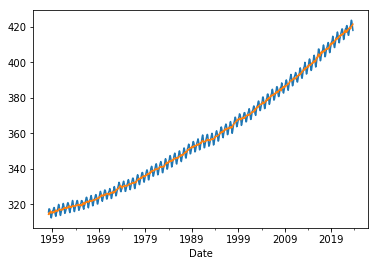

In [27]:
sorted_data["CO2.1"].plot()
sorted_data["seasonally.2"].plot()

On peut ainsi observer deux phénomènes :
    1. La quantité de CO2 dans l'atmosphère augmente avec le temps
    2. Il y a des oscillations récurrentes
Pour étudier ces oscillations, on fait (première courbe) - (deuxième courbe)

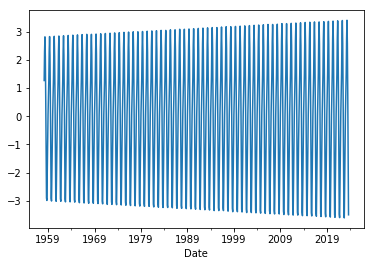

In [28]:
(sorted_data["CO2.1"] - sorted_data["seasonally.2"]).plot()

En zoomant, on voit que ces oscillations se répètent tous les ans.
Le pic le plus haut arrive vers le mois de mai et la falaise la plus basse arrive vers le mois de septembre.

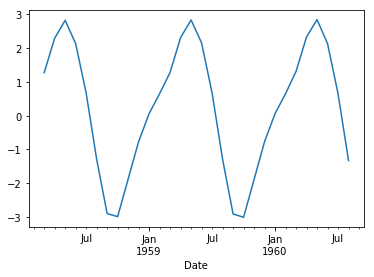

In [29]:
(sorted_data["CO2.1"] - sorted_data["seasonally.2"])[:30].plot()

La courbe qui correspond à CO2.1 semble être une courbe exponentielle.
On peut trouver une courbe approximative en testant avec quelques valeurs.

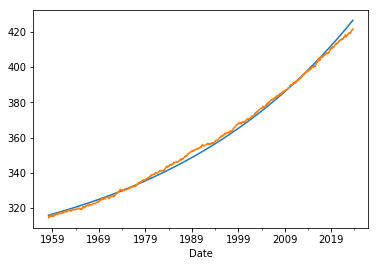

In [30]:
a = 32
lmbda = 0.0019
b = 284
sorted_data["approximation"] = [a * math.e**(lmbda*x) + b for x in range(len(sorted_data))]

sorted_data["approximation"].plot()
sorted_data["seasonally.2"].plot()

On essaye maintenant de prédire l conentration de CO2 dans l'atmosphère dans le futur.

le dernier mois présent dans les données : 2023-09


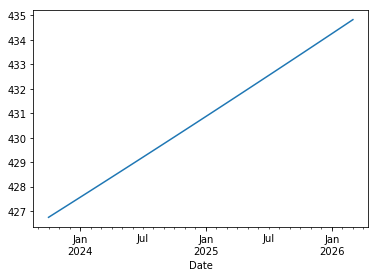

In [31]:
nb_months = 30

last_date_in_data = raw_data["Date"][raw_data["Date"].keys()[-1]]
print("le dernier mois présent dans les données :", last_date_in_data)

dates = []
for i in range(1, nb_months+1):
    year = last_date_in_data.year+i//12
    month = last_date_in_data.month+i%12
    dates.append(pd.Period(year=year, month=month, freq="M"))

a = 32
lmbda = 0.0019
b = 284
approximations = [a * math.e**(lmbda*x) + b for x in range(len(sorted_data), len(sorted_data)+nb_months)]

data = {'Date': dates, 'approximation': approximations}

df = pd.DataFrame(data)
df = df.set_index('Date')

df['approximation'].plot()

On peut estimer que :
- la concentration de CO2 dans l'atmosphère au début 2025 est d'environ 431ppm
- elle augmente jusqu'à 434ppm à la fin 2025.